# Dynamics of the Periodically Driven Long-Range TF Ising Model

## Introduction
The 1-dimensional Ising model with long range spin exchange and periodicaly driven transverse field is modelled by the spin Hamiltonian 
$$
H(\beta, h_0, \omega, t) = -  \mathcal{J}\sum^N_{i<j}j_\beta\frac{\sigma^x_i\sigma^x_j}{|i-j|^\beta} - \left[h_0 + h_D \cos{\left(\omega_D t\right)}\right]\sum^N_i \sigma^z_i,
$$
where $j_\beta$ is chosen  as per the Kac prescription so as to keep the energy per spin finite in the thermodynamic limit. Thus,
$$
j_\beta = \frac{N^{1-\beta}}{\sum^N_{i\neq j}|i-j|^{-\beta}}.
$$
Consider the case $\beta = 0$, where $j_0 = 2/(N-1)$. In the thermodynamic limit ($N\rightarrow\infty$), this system approaches the mean-field dynamics given by the driven Lipkin-Meshkov-Glick (LMG) model [1]. Here, the many body state is completely uncorrelated and can be written as a product state *viz* $|\Psi(t)\rangle \overset{N\rightarrow\infty}{=} \displaystyle\prod^N_{i=1} |\psi_{MF}(t)\rangle$ [2], where all the $|\psi_{MF}(t)\rangle$'s are identical and obey the self-consistently updated Non - Linear Schrödinger Equation (NLSE) given by
$$
i \frac{\mathrm d}{\mathrm{d}t}|\psi_{MF}(t)\rangle = \widetilde{H}\big\{|\psi_{MF}(t)\rangle, t\big\}|\psi_{MF}(t)\rangle,
$$
where
$$
\widetilde{H}\big\{|\psi_{MF}(t)\rangle, t\big\} =  -  \mathcal{J}\langle \psi_{MF}(t)|\sigma^x|\psi_{MF}(t)\rangle\;\sigma^x -  \left[h_0 + h_D \cos{\left(\omega_D t\right)}\right]\;\sigma^z.
$$

Now, for the first attempt at a solution, we make the (admittedly poor) approximation of keeping the self-consistent field update at its value at $t=0$. Then, the equation above reduces to the dynamics of a driven Two-Level system (TLS), where $\widetilde{H}\big\{ t\big\} = \mathcal{J}\;\vec{\sigma}\cdot\vec{r}(t)$, and $\vec{r} = -\epsilon\hat{x} - \left[h_0 + h_D \cos{\left(\omega_D t\right)}\right]\;\hat{z}$ with $\epsilon = \langle\sigma^z\rangle_{t=0}$. In that case, for $\omega \gg h_0$, the Rotating Wave Approximation (RWA) can be taken and the dynamics of the equivalent RWA Hamiltonian $\widetilde{H}^R\big\{ t\big\} = \mathcal{J}\;\vec{\sigma}\cdot\vec{R}$ can be obtained analytically[3] with $\vec{R} = -h_0\hat{z} - J_0(\eta)\hat{x}$. Note that the ensuing dynamics is in the rotated frame given by the unitary transformation $W(t) = \exp{\left\{i\eta\sin{\left(\omega_Dt\right)\sigma^z}\right\}}$, where $\eta = \displaystyle\frac{2h_D}{\mathcal{J}\omega_D}$, and $J_0(\eta)$ is the Bessel Function of the first kind (obtained from the most rapidly oscillating term in the Fourier series expansion of $W(t)$)[3]. In this RWA limit, the dynamics of the response $\sigma^z(t)$ exhibits coherent destruction of tunneling (CDT) when $J_0(\eta)=0$. In the CDT limit,$\sigma^z$ is 'frozen' at its value at $t=0$. Our goal is to determine if this phenomenon survives in the exact dynamics for any value of $\beta$ due, perhaps, to topological considerations. Note that CDT can also be seen for $\beta = \infty$ due to the integrability of the nearest-neighbour model via the Jordan-Wigner Transformation [4]. In this limit, CDT can persist even for finite $N$ [5], as well as in the presence of disorder [6].  However, $H(\infty, \dots)$ is not homotopic with $H(0, \dots)$.

## Numerical Investigation for  $\beta = 0$. 

First, let us look at the Mean-Field dynamics (exact in the thermodynamic limit) of the LMG model described above. The simulation is relatively simple, and we start from the numerically obtained ground state of the zero-field Hamiltonian (note that this is just the eigenstate of $\sigma^x$; it does not appear to be interesting to start from an eigenstate of $\sigma^z$, as then the MF dynamics becomes trivial due to $\epsilon$ vanishing). 

### Magnetization Plots

Below lie the code and data for evaluating and plotting the magnetization $\langle \sigma^z\rangle$ as a function of time for both the Mean field (MF) dynamics and the Two-level system (TLS) dynamics for the problem above. For a fixed $h_0$, three values of $\omega_D$ are chosen *viz.*, one when $\omega_D = h_0$, one for which $J_0(\displaystyle\frac{2h_0}{\omega_D}) = 0$ and freezing for the TLS dynamics is expected, and one for which a similar freezing in the MF dynamics can be observed.

The left panels contain plots of  $\langle \sigma^z\rangle$ as a function of time $t$ (in units of $\hbar/J$ for exchange energy $J$), and the right panels contain the corresponding Fourier signals, defined as
$$
S^z_\omega = \int^\infty_{-\infty}\mathrm{d}t\; \left[\langle\sigma^{z} (t)\rangle - \overline{\langle \sigma^{z}(t) \rangle}\right]\; e^{-i\omega t},
$$
where the over-bar denotes a long-time average. This is plotted in arbitrary units as functions of $\omega\over\omega_D$. I have removed the contribution of the long time average from the signal for the sake of clarity. Note that, when $J_0(\displaystyle\frac{2h_0}{\omega_D}) = 0$, the TLS response loses all frequencies except for the trivial $\omega = \omega_D$, but the MF response does not. However, at around $\omega \approx 15$ (when $h_0 = 25$), the MF signal appears to be completely frozen at the initial state, as can be seen from the signal analysis. 

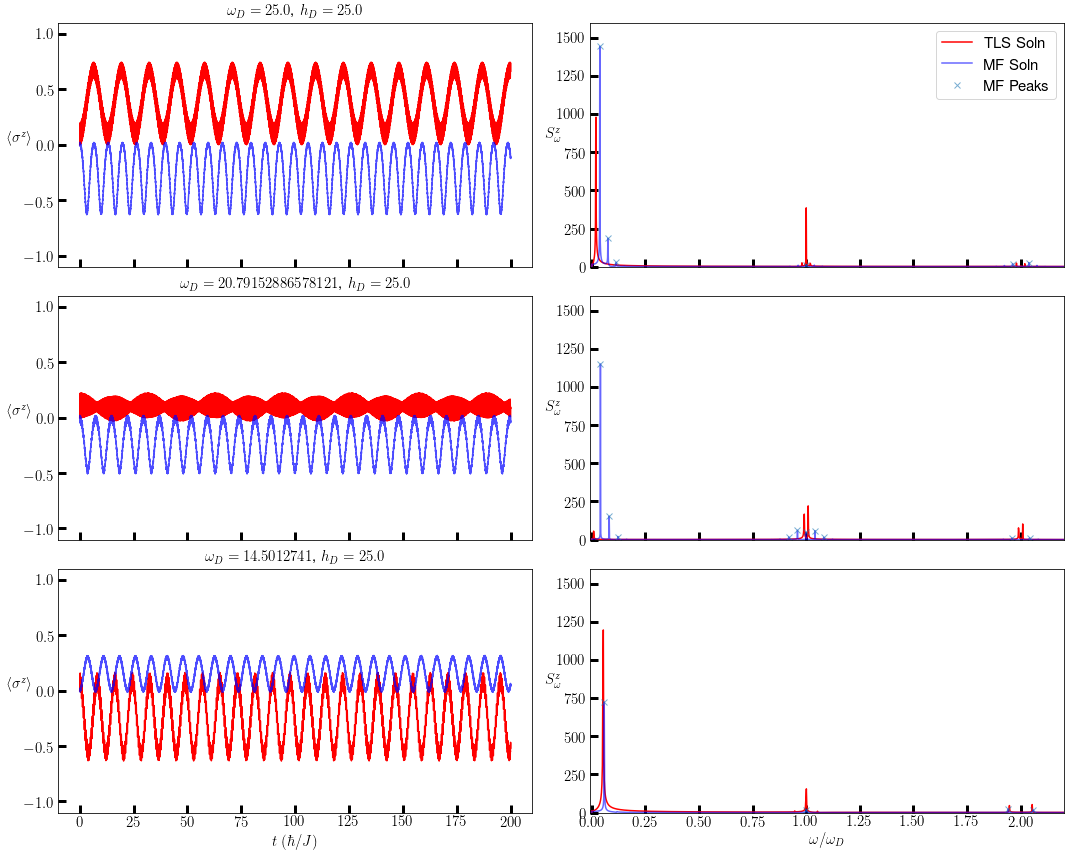

In [1]:
import numpy as np
from numpy.linalg import multi_dot, norm, eig
from odeintw import odeintw
from scipy.signal import find_peaks

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

fs = 15
pheightmin = 10

fig, axs = plt.subplots(3, 2, sharex='col', figsize=(15,12))

sx = np.array([[0, 1],[ 1, 0]])
sy = np.array([[0, -1j],[1j, 0]])
sz = np.array([[1, 0],[0, -1]])

t = np.linspace(0, 200, 10000)
h0 = 0.1
h = 25.0
eta = 2.40482555769577
omegas = [h, 2.0 * h/eta, 14.5012741]

lastplot = len(omegas) - 1

def mf_jac (psi, t, h0, h, omega):
    sx_mf = multi_dot([psi.conjugate(), sx, psi])
    drive = h0 + h * np.cos(omega * t)
    jac = (1j) * (sx_mf * sx + drive * sz)
    return jac

def mf_func (psi, t, h0, h, omega):
    return np.dot(mf_jac(psi, t, h0, h, omega), psi)

def tls_jac (psi, t, h0, h, omega):
    drive = h0 + h * np.cos(omega * t)
    jac = (1j) * (sx + drive * sz)
    return jac

def tls_func (psi, t, h0, h, omega):
    return np.dot(tls_jac(psi, t, h0, h, omega), psi)

#Start from the t=0 ground state
#evals, evecs = eig((1j) * tls_jac(None, 0.0, h0, h, 1.0))
#psi0 = evecs[:,np.argmin(evals)].copy()

#Start from eigenstate of sx
evals, evecs = eig((1j) * tls_jac(None, 0.0, 0.0, 0.0, 0.0))
psi0 = evecs[:,np.argmin(evals)].copy()

for i, w in enumerate(omegas):
    # Set up the inputs and call odeintw to solve the system.
    sol_mf = odeintw(mf_func, psi0, t, args=(h0, h, w), Dfun=mf_jac)
    sol_tls = odeintw(tls_func, psi0, t, args=(h0, h, w), Dfun=tls_jac)
    #calculate expectation values
    mx_mf = np.einsum("ij,jk,ik->i", sol_mf.conjugate(), sx, sol_mf)
    mz_mf = np.einsum("ij,jk,ik->i", sol_mf.conjugate(), sz, sol_mf)
    mx_tls = np.einsum("ij,jk,ik->i", sol_tls.conjugate(), sx, sol_tls)
    mz_tls = np.einsum("ij,jk,ik->i", sol_tls.conjugate(), sz, sol_tls)
    
    axs[i, 0].set_title(r"$\omega_D = {}$, ".format(w) + r"$h_D = {}$ ".format(h), fontsize=fs)
    axs[i, 0].plot(t, mz_tls.real,'r', label = "TLS Soln")
    axs[i, 0].plot(t, mz_mf.real, 'b', label = "MF Soln", alpha=0.7)
    axs[i, 0].set_ylabel(r'$\langle\sigma^z\rangle$',fontsize=fs, rotation=0)
    axs[i, 0].tick_params(direction='in', length=8, width=3, labelsize=fs)
    axs[i, 0].set_yticks([-1.,-0.5,0.,0.5,1.], minor=False)
    #axs[i, 0].set_xlim(-1.1, 10.1)
    axs[i, 0].set_ylim(-1.1, 1.1)
    
    #Now, FFT
    freqs_mf = np.fft.fftshift(np.fft.fftfreq(np.size(mz_mf), d=t[1]-t[0]))
    spectrum_mf = np.fft.fftshift(np.fft.fft(mz_mf - np.average(mz_mf)))
    freqs_tls = np.fft.fftshift(np.fft.fftfreq(np.size(mz_tls), d=t[1]-t[0]))
    spectrum_tls = np.fft.fftshift(np.fft.fft(mz_tls - np.average(mz_tls)))
    axs[i, 1].set_ylabel(r'$S^z_\omega$',fontsize=fs, rotation=0)
    axs[i, 1].tick_params(direction='in', length=8, width=3, labelsize=fs)
    axs[i, 1].plot(2.0 * np.pi * freqs_tls.real/w, np.abs(spectrum_tls),'r', label = "TLS Soln")
    axs[i, 1].plot(2.0 * np.pi * freqs_mf.real/w, np.abs(spectrum_mf),'b', label = "MF Soln", alpha=0.6)
    peaks, _ = find_peaks(np.abs(spectrum_mf), height=pheightmin)
    axs[i, 1].plot(2.0 * np.pi * freqs_mf[peaks].real/w, np.abs(spectrum_mf[peaks]), "x", label = "MF Peaks", alpha=0.6)
    axs[i, 1].set_ylim(-0.01, 1600)
    axs[i, 1].set_xlim(-0.01, 2.2)


axs[lastplot, 0].set_xlabel(r'$t\;(\hbar/J)$',fontsize=fs)    
axs[lastplot, 1].set_xlabel(r'$\omega/\omega_D$',fontsize=fs)

legend0 = axs[0, 1].legend(prop={'size': fs})

# Norm sanity check
#plt.plot(t, np.abs(sol_mf[:, 0])**2 + np.abs(sol_mf[:, 1])**2)
fig.tight_layout()

### Detailed investigation of 'freezing' in the Parameter Space

We now look at plots of $S^m_\omega$, the  maximum peak height in the FFT of the time signal, as function of $\omega_D$. The code below (self expanatory) does just this. Note that, for $h_0 = 25 $, $S^m_\omega$ has a highly non-monotonic dependence for the MF dynamics (left panel below) and approaches a small minimum (nearly $0$) for a discrete set of values of, signifying a freeze of the system in its initial state. Thus, we can infer that this resonance occurs at multiiple values of $\omega$ for every $h_0$. The positions of these minima are quantitatively different for the TLS dynamics (right panel below), where they occur, as expected from the RWA analysis described above, at the zeroes of $J_0(\eta)$, as can be seen from the plot on the rightmost ordinate below.

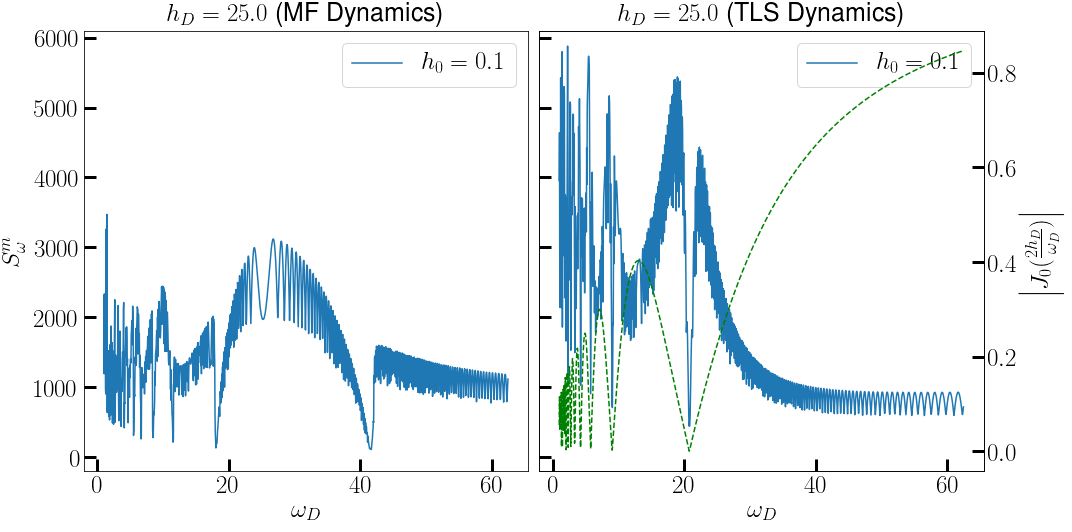

In [16]:
import numpy as np
from numpy.linalg import norm, eig
from multiprocessing import Pool
import lipkin as mfd
import time
from scipy.special import j0

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

if __name__ == '__main__':
    nprocs = 13
    evals, evecs = eig((1j) * mfd.tls_jac(None, 0.0, 0.0, 0.0, 0.0))
    psi0 = evecs[:,np.argmin(evals)].copy()
    h = 25.0
    h0 = [0.1]
    omegas = np.linspace(20.0, 21.0,  3 * nprocs)
    t = np.linspace(0, 500, 20000)
    p = Pool(processes = nprocs)
    
    fs = 25
    threshold = 130.0
    
    fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15,7.5))
    axs[0].set_title(r"$h_D = {}$ (MF Dynamics)".format(h), fontsize=fs)
    axs[0].set_ylabel(r'$S^m_\omega$',fontsize=fs, rotation="vertical")
    
    for dc in h0:
        ## Internal Execution
        #print("TLS dynamics for h0 = %f, w with %d processes ..." % (dc, nprocs))
        #start = time.time()
        #dq_tls = p.starmap(mfd.maxfft_mag_tls,[(t, psi0, dc, h, w) for w in omegas])
        #elapsed =  (time.time() - start)
        #print("Done in %lf secs" % elapsed)
        #print("MF dynamics for h0 = %f, w with %d processes ..." % (dc, nprocs))
        #start = time.time()
        #dq_mf = p.starmap(mfd.maxfft_mag_mf,[(t, psi0, dc, h, w) for w in omegas])
        #elapsed = (time.time() - start)  
        #print("Done in %lf secs" % elapsed)
  
        ## Load from external execution
        fname = "mf_tls_driven_hd_25.0_h0_0.1_pheight.csv"
        data = np.loadtxt(fname, delimiter=",")
        omegas = data[:,0]
        dq_mf = data[:,1]
        dq_tls = data[:,2]
        
        axs[0].plot(omegas, dq_mf, label = r'$h_0 = {}$ '.format(dc))
        legend0 = axs[0].legend(prop={'size': fs})
        axs[1].plot(omegas, dq_tls, label = r'$h_0 = {}$ '.format(dc))
        legend1 = axs[1].legend(prop={'size': fs})
        ax_besj = axs[1].twinx()
        ax_besj.set_ylabel(r"$\left | J_0(\frac{2h_D}{\omega_D})\right |$",fontsize=fs)
        ax_besj.plot(omegas, np.abs(j0(2*h/omegas)), "g--")
    
        axs[0].set_title(r"$h_D = {}$ (MF Dynamics)".format(h), fontsize=fs)
        axs[1].set_title(r"$h_D = {}$ (TLS Dynamics)".format(h), fontsize=fs)

    for ax in axs:
        ax.set_xlabel(r'$\omega_D$',fontsize=fs)
        ax.tick_params(direction='in', length=12, width=3, labelsize=fs)
        ax.set_ylim(-200, 6100)
    ax_besj.tick_params(direction='in', length=12, width=3, labelsize=fs)
    fig.tight_layout()
    plt.plot()

## Conclusions

These points of near-infinite freezing (for sufficiently large $\omega_D$ so as to discount adiabatic effects) are shown above in the minima of the plots. Thus, we can conclude the following

* The 'freezing of response' as described for TLS dynamics in [3,4] does not appear to occur in the thermodynamic limit for long range systems, but a different mechanism of freezing appears at different resonant frequencies for the mean field case ($\beta = 0$). It remains to be seen if these responses persist for $\beta \gg 0$. These are contrasted with the TLS case, where, at freezing,  $J_0(2h_D/\omega_D) = 0$[3,4]. 

* The FFT of the signal (shown in the first figure above) seems to indicate a large dominant amplitude at frequency $\omega \ll \omega_D$ for most drive frequencies. While this is essentially single particle behaviour when $\beta = 0$ and occurs in the absence of any Off-Diagonal Long-Range order, if these oscillations persist for nonzero $\beta$ in the thermodynamic limit with ODLRO due to the appearence of two-body correlations [2], then this response could indicate a stable 'time crystal' phase.

# Finite Size Contributions

In order to investigate this phenomenon for nonzero $\beta$, where mean field is not exact in the thermodynamic limit, We require full many body simulations of the dynamics. To that end, we need to determine the role of finite size effects that arise in the many body simulation. We contrast the MF solution for $\beta=0$ with exact dynamics for small lattice size ($N=9$ with PBC is as far as our computational resources will allow before memory overload). Plots of $\langle \sigma^z\rangle$ vs time for both cases clearly shows that finite size effects alter the dynamics significantly past time scales of $\mathcal{O}(10^)$, in qualitative agreement with results from ref[2]. Thus, exact diagonalization methods prove to be insufficient .

Mean Field Solution Completed.
Running Finite Size Exact Dynamics for h0 = 0.100000 and omega = 0.000000:
Exact Solution for N = 9 Completed.
Mean Field Solution Completed.
Running Finite Size Exact Dynamics for h0 = 0.100000 and omega = 17.575800:
Exact Solution for N = 9 Completed.
Mean Field Solution Completed.
Running Finite Size Exact Dynamics for h0 = 0.100000 and omega = 25.000000:
Exact Solution for N = 9 Completed.


[]

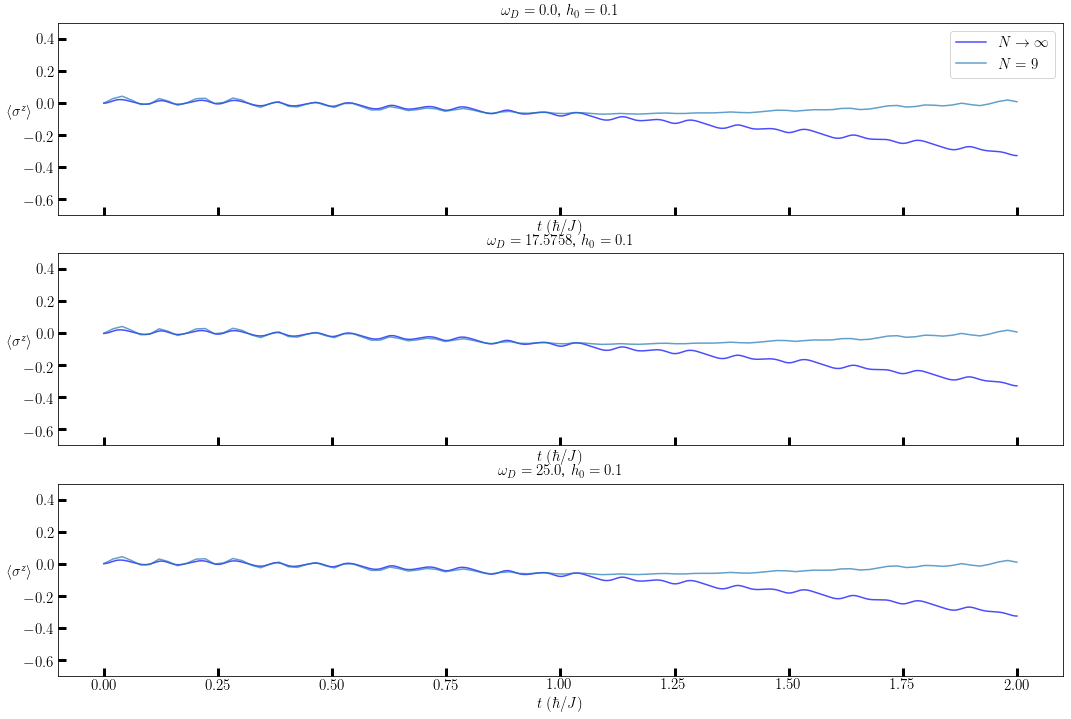

In [9]:
import numpy as np
from numpy.linalg import multi_dot, norm, eig
from odeintw import odeintw
from scipy.signal import find_peaks

import curie_weiss_periodic as cp

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

fs = 15
h0 = 0.1
h = 25.0

sx = np.array([[0, 1],[ 1, 0]])
sy = np.array([[0, -1j],[1j, 0]])
sz = np.array([[1, 0],[0, -1]])

t = np.linspace(0, 2.0, 10000)
t_exact = np.linspace(0, 2.0, 100)

finite_sizes = 9

omegas = [0.0, 17.5758, 25.0]

fig, axs = plt.subplots(len(omegas), 1, sharex='col', figsize=(18,12))

def mf_jac (psi, t, h0, h, omega):
    sx_mf = multi_dot([psi.conjugate(), sx, psi])
    drive = h0 + h * np.cos(omega * t)
    jac = (1j) * (sx_mf * sx + drive * sz)
    return jac

def mf_func (psi, t, h0, h, omega):
    return np.dot(mf_jac(psi, t, h0, h, omega), psi)

#Exact Diagonalization of finite sizes
def exact_dynamics(p):
    h = cp.Hamiltonian(p)
    initstate =  np.ones(2**p.lattice_size, dtype="float64")/np.sqrt(2**p.lattice_size)
    return cp.run_dyn(p, initstate)

#Start from eigenstate of sx
evals, evecs = eig((1j) * tls_jac(None, 0.0, 0.0, 0.0))
psi0 = evecs[:,np.argmin(evals)].copy()

for i, w in enumerate(omegas):
    # Set up the inputs and call odeintw to solve the mean field system.
    ##sol_mf = odeintw(mf_func, psi0, t, args=(h0, h, w), Dfun=mf_jac)
    #calculate expectation values
    mz_mf = np.einsum("ij,jk,ik->i", sol_mf.conjugate(), sz, sol_mf)
    print("Mean Field Solution Completed.")

    axs[i].set_title(r"$\omega_D = {}$, ".format(w) + r"$h_0 = {}$ ".format(h0), fontsize=fs)
    axs[i].set_xlabel(r'$t\;(\hbar/J)$',fontsize=fs)    
    axs[i].set_ylabel(r'$\langle\sigma^z\rangle$',fontsize=fs, rotation=0)
    axs[i].tick_params(direction='in', length=8, width=3, labelsize=fs)
    axs[i].plot(t, mz_mf.real, 'b', label = r"$N\to\infty$", alpha=0.7)
    print("Running Finite Size Exact Dynamics for h0 = %f and omega = %f:"%(h0, w))
    n = finite_sizes
    J = np.ones(n**2).reshape(n,n) * 2.0 / (n-1)
    #Set up the inputs and call curie_weiss_periodic to solve the exact system.
    p = cp.ParamData(hopmat = J, lattice_size=n, ampl = -25.0, omega=w, times=t_exact, hx=0.0, hy=0.0, hz=-h0, jx=-1.0, jy=0.0, jz=0.0)
    ##ed_data = exact_dynamics(p)
    print("Exact Solution for N = %d Completed." % n)   
    axs[i].plot(t_exact, np.real(ed_data["sz"]), label = r"$N = %d$" % n, alpha=0.7)
legend0 = axs[0].legend(prop={'size': fs})
for ax in axs:
    ax.set_ylim([-0.7, 0.5])
plt.plot()

# Comparison of Exact Dynamics with DTWA

Here, we compare the exact dynamics of finite sizes with the Approximate dynamics of the Discrete Truncated Wigner Approximation. Note that exact dynamics is an NP hard problem, with the problem size scaling as $2^N$. Thus, it is computationally impractical to simulate this in classical computers beyond $N = \mathcal{O}(10^1)$. However, in the Truncated Wigner Approximation, the problem scales as $n_i\times 3N$, where $n_i$ is the number of Monte Carlo samples [7], and improvements in accuracy of DTWA added using the BBGKY heirarchy method on the Phase point operators [8], cause the dynamics to scale as $n_i \times 9 N^2$ [7]. We have the machinery set up for doing both DTWA and DTWA-BBGKY for general Curie-Weiss models, but presently lack the computational resources to run for system sizes larger than $N = 25-30$. **With access to resources such as [SAIL] (https://cs.stanford.edu/csdcf/sail-compute-cluster) or equivalent, we can readily scale this up to $N = 10^4$ (for DTWA) or $10^3$ (for DTWA-BBGKY).**

## TODO:

Commit Mahbub's periodic drive mods to dtwa_quantum_spins to main.

In [11]:
import numpy as np
from mpi4py import MPI
import dtwa_quantum_spins as dtwa

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

fs = 15

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()
#Parameters
lattice_size = 8
alpha = 0.0
f = 25.0
jx, jy, jz = -1.0, 0.0, 0.0
hx, hy, hz = 0.0, 0.0, -25.0
niter = 150
hdc = 0.1

#Build the hopping matrix
size = lattice_size
jmat = np.zeros((size, size))
for mu in xrange(size):
    for nu in xrange(mu, size):
        if mu != nu:
            dmn = np.abs(mu-nu)
            jmat[mu,nu] = 1.0/pow(dmn,alpha)
#Initiate the parameters in object
mid = np.floor(size/2).astype(int)
kacnorm =2.0 * np.sum(1/(pow(np.arange(1, mid+1), alpha).astype(float)))
p = dtwa.ParamData(hopmat=(jmat+jmat.T),norm = kacnorm, latsize=size,\
                              jx=jx, jy=jy, jz=jz, hx=hx, hy=hy, hz=hz, omega=f, hdc=hdc)

d = dtwa.Dtwa_System(p, comm, n_t=niter, verbose=False)
    
#Prepare the times
t0 = 0.0
ncyc = 50.0
nsteps = 500
data = d.evolve((t0, ncyc, nsteps), sampling="spr")
if rank == 0:
    times =   data.t_output
    sz_data = data.sz.real

ImportError: libmpi.so.40: cannot open shared object file: No such file or directory

## References
1. Lipkin, H. J., N. Meshkov, and A. J. Glick. “Validity of Many-Body Approximation Methods for a Solvable Model: (I). Exact Solutions and Perturbation Theory.” Nuclear Physics 62, no. 2 (February 1, 1965): 188–98. https://doi.org/10/fpqf4q.
2. Mori, T. “[1810.01584] Prethermalization in the Transverse-Field Ising Chain with Long-Range Interactions.” Accessed October 30, 2019. https://arxiv.org/abs/1810.01584.
3. Miao, Qiang, and Yujun Zheng. “Coherent Destruction of Tunneling in Two-Level System Driven across Avoided Crossing via Photon Statistics.” Scientific Reports 6, no. 1 (June 29, 2016): 1–12. https://doi.org/10.1038/srep28959.
4. Das, Arnab. “Exotic Freezing of Response in a Quantum Many-Body System.” Phys. Rev. B 82, no. 17 (November 2010): 172402. https://doi.org/10.1103/PhysRevB.82.172402.
5. Hegde, Swathi S., Hemant Katiyar, T. S. Mahesh, and Arnab Das. “Freezing a Quantum Magnet by Repeated Quantum Interference: An Experimental Realization.” Physical Review B 90, no. 17 (November 7, 2014): 174407. https://doi.org/10.1103/PhysRevB.90.174407.
6. Roy, Analabha, and Arnab Das. “Fate of Dynamical Many-Body Localization in the Presence of Disorder.” Physical Review B 91 (2015): 121106. https://doi.org/10/gcz8z2.

 7. Schachenmayer J., Pikovski A., Rey A.M. "Many-Body Quantum Spin Dynamics with Monte Carlo Trajectories on a Discrete Phase Space", Phys. Rev. X 5, 011022 (2015), https://doi.org/10.1103/PhysRevX.5.011022 .
 8. Lorenzo Pucci, Analabha Roy, and Michael Kastner, "Simulation of quantum spin dynamics by phase space sampling of Bogoliubov-Born-Green-Kirkwood-Yvon trajectories", Phys. Rev. B 93, 174302 (2016). https://doi.org/10.1103/PhysRevB.93.174302 .